In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/jorb1/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

Text(0.5, 0, 'Catches of Salmon Species (in thousands of fish)')

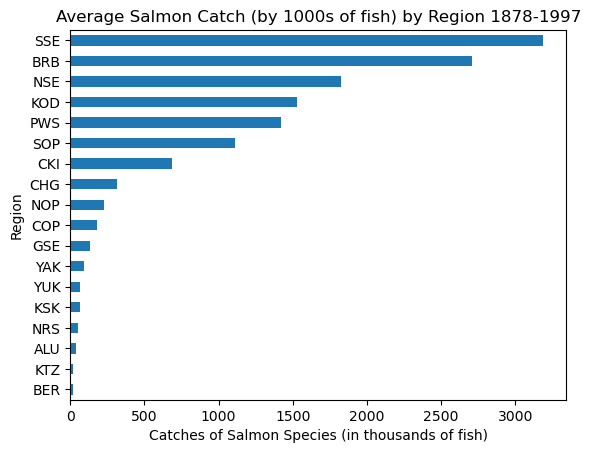

In [14]:
# FINAL CODE

import pandas as pd
catch_data = pd.read_csv("data/salmon_data.csv").drop('notesRegCode', axis=1)

catch_data.at[400, "Catch"] = 1 # Update mistaken I to 1

# Update Catch column to have dtype int64
catch_data['Catch'] = catch_data['Catch'].astype('int64') 

# Calculate the mean catch of salmon by region, and then plot it in an understandable format
catch_data_plot = (catch_data.groupby(['Region'])
            .mean()
            .Catch
            .sort_values()
            .plot(kind='barh',
                 title='Average Salmon Catch (by 1000s of fish) by Region 1878-1997',
                 ylabel=('Region')))
catch_data_plot.set_ylabel(ylabel='Region')
catch_data_plot.set_xlabel(xlabel='Catches of Salmon Species (in thousands of fish)')

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

In [1]:
# Load libraries
import pandas as pd

<!-- BEGIN QUESTION -->



In [2]:
# a.
# Read in the data
catch_data = pd.read_csv("data/salmon_data.csv")

In [3]:
# Look at the first few rows of the dataframe
catch_data.head(3)

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# b. 
# Check the data type of each column in the dataframe
print(catch_data.dtypes)

# Check how many rows and columns are in the dataframe
print(catch_data.shape)

# Check and see how many NaNs are in each column
print(catch_data.isnull().sum())


Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object
(8540, 5)
Region             0
Year               0
notesRegCode    7125
Species            0
Catch              0
dtype: int64


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I chose to do an exploration of the data types, in case I need to use certain functions, I will need to know the types to see if I need to perform any transformations to the data in order to use these functions. For example, I wanted to know if the 'year' column was in date or numeric form. I learned that it was an int64.

I also chose to do the .shape function to see the dimensions of the dataframe. I noticed there are a few columns in the head that look like they might be blank. I wanted to see the overall shape to make sure I was understanding that correctly. It turns out that was just the way that .head renders.

I noticed some NaN values in the head as well. I wanted to see how many there were per column, so I would know where I needed to deal with them. 

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [5]:
# Use the .unique() function to create a list of all unique variables in the notesREGCode column
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [6]:
# First, use .drop to remove the column, and then .head to check the list of columns to make sure it worked
catch_data = catch_data.drop(columns='notesRegCode')
catch_data.head(5)

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0


<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


In [7]:
# Use .dtypes to find out what kind of data types are in each column
print(catch_data.dtypes)

Region     object
Year        int64
Species    object
Catch      object
dtype: object


I ran the test earlier, but did it here again after dropping the column. The unexpected data type from the list is catch, which should be a numeric data type. The rest of the data types are as expected. 

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [8]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [9]:
# Find the row with the I instead of the 1
catch_I = catch_data[catch_data['Catch'].str.contains('I', na=False)]
catch_I

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [10]:
# Update the I to a 1
catch_data.at[400, "Catch"] = 1

# Store this update as a variable
catch_1 = catch_data.loc[400, ]
catch_1

Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [11]:
# Change the dtype of the Catch column to numeric, or int64
catch_data['Catch'] = catch_data['Catch'].astype('int64')

catch_column_type = catch_data['Catch'].dtypes
catch_column_type

dtype('int64')

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [12]:
# Use groupby() and mean() to great a plottable set of data sorting by region and calculating average Catch
avg_region = catch_data.groupby('Region')['Catch'].mean().sort_values()

avg_region

Region
BER      16.372549
KTZ      18.836145
ALU      40.383908
NRS      51.502703
KSK      67.642353
YUK      68.645570
YAK      91.922917
GSE     133.841463
COP     179.223404
NOP     229.493478
CHG     315.487273
CKI     683.571429
SOP    1110.942222
PWS    1419.236697
KOD    1528.350000
NSE    1825.020870
BRB    2709.796491
SSE    3184.660714
Name: Catch, dtype: float64

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

Text(0.5, 0, 'Catches of Salmon Species (in thousands of fish)')

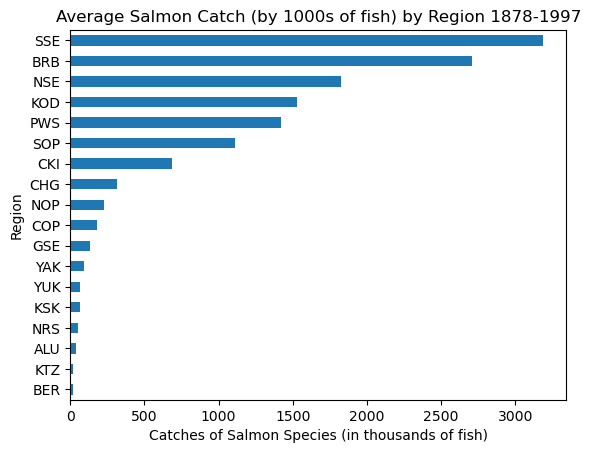

In [13]:
# Create a plot from the groupby() data above that shows the average Salmon catch by region

catch_data_plot = avg_region.plot(kind='barh',
               title="Average Salmon Catch (by 1000s of fish) by Region 1878-1997",
                legend=False)
catch_data_plot.set_ylabel(ylabel='Region')
catch_data_plot.set_xlabel(xlabel='Catches of Salmon Species (in thousands of fish)')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

This plot shows the average number (measured in thousands of fish) of salmon caught in these regions between the years of 1878 and 1997. This plot shows that in this long period of time, the Southern Southeast (SSE) region of Alaska was the most productive. The Bering River Subarea (BER) was the lowest producing during that time. 

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).